# 1. Understanding Regularization Penalties


Let's delve deeper into how regularization penalties are applied in regression models, focusing on how L1 (Lasso) and L2 (Ridge) regularization work. We'll explore the mechanics of the penalty application through mathematical equations and practical examples to clarify their effects on the model coefficients.

## 1.1. Linear Regression Objective Function

In linear regression, the goal is to minimize the loss function, typically the Mean Squared Error (MSE):

### 1.1.1 Basic Objective Function

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \left( \theta_0 + \sum_{j=1}^{n} \theta_j x_j^{(i)} \right) \right)^2
$$

Where:
- $J(\theta)$ is the cost function.
- $m$ is the number of training examples.
- $y^{(i)}$ is the true output for the $i$-th example.
- $\theta$ are the model parameters (coefficients).
- $x_j^{(i)}$ is the $j$-th feature for the $i$-th example.

### 1.1.2. Regularization Terms

#### L1 Regularization (Lasso)

L1 regularization adds a penalty proportional to the absolute values of the coefficients:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \left( \theta_0 + \sum_{j=1}^{n} \theta_j x_j^{(i)} \right) \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

- **Penalty:** $\lambda \sum_{j=1}^{n} |\theta_j|$
- **Effect:** Encourages sparsity, driving some coefficients to zero, which can result in feature selection.
- **$\lambda$:** A hyperparameter that controls the strength of the penalty. Larger $\lambda$ means more penalty.

#### L2 Regularization (Ridge)

L2 regularization adds a penalty proportional to the square of the coefficients:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \left( \theta_0 + \sum_{j=1}^{n} \theta_j x_j^{(i)} \right) \right)^2 + \frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2
$$

- **Penalty:** $\frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2$
- **Effect:** Shrinks all coefficients, reducing the impact of less important features but never setting them exactly to zero.
- **$\lambda$:** Controls the amount of shrinkage applied to the coefficients.

Regularization helps prevent overfitting by adding a penalty to the loss function, discouraging overly complex models. The choice between L1 and L2 regularization depends on the specific requirements of the model and the dataset.


## 1.2. Example to Illustrate Penalties

The Diabetes dataset contains 10 baseline variables, age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements, obtained for each of 442 diabetes patients, along with the response of interest, a quantitative measure of disease progression one year after baseline.
- **Features:** 10 continuous features
- **Target:** A quantitative measure of disease progression

Loading and Preparing the Data


In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['Progression'] = y

# Display the first few rows of the dataset
print(df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  


Applying Regularization


In [4]:
# Train Linear Regression (No Regularization)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Train Lasso Regression
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print coefficients and MSE
print("\nLinear Coefficients:", linear_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)
print("Ridge Coefficients:", ridge_model.coef_)
print("\nMean Squared Error (Linear):", mse_linear)
print("Mean Squared Error (Lasso):", mse_lasso)
print("Mean Squared Error (Ridge):", mse_ridge)



Linear Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Lasso Coefficients: [  0.          -0.         413.43184792  34.83051518   0.
   0.          -0.           0.         258.15289363   0.        ]
Ridge Coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]

Mean Squared Error (Linear): 2900.193628493482
Mean Squared Error (Lasso): 3403.5757216070733
Mean Squared Error (Ridge): 3077.41593882723


Visualizing the Effect of Regularization


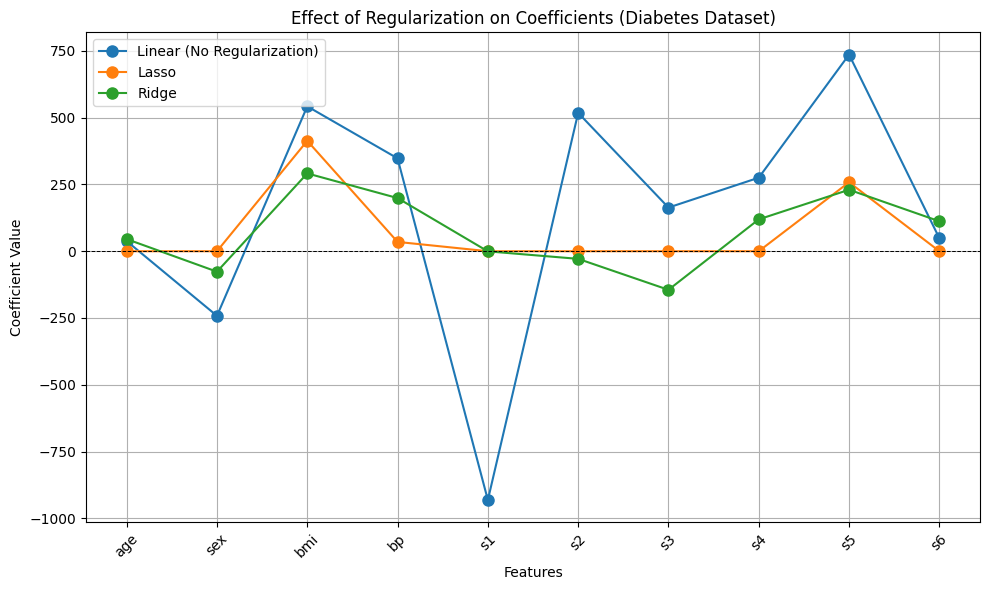

In [5]:
# Plot coefficients
plt.figure(figsize=(10, 6))
plt.plot(linear_model.coef_, 'o-', label='Linear (No Regularization)', markersize=8)
plt.plot(lasso_model.coef_, 'o-', label='Lasso', markersize=8)
plt.plot(ridge_model.coef_, 'o-', label='Ridge', markersize=8)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, rotation=45)
plt.title('Effect of Regularization on Coefficients (Diabetes Dataset)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 1.3. Interpretation of Results

1. **Linear Regression (No Regularization)**

    - The model fits the training data by minimizing the Mean Squared Error (MSE) without any penalty on the coefficients. This can lead to large coefficients, especially if the features are correlated or there is noise in the data.

2. **Lasso Regression**

    - **Penalty:** The L1 penalty encourages sparsity in the coefficients. Some coefficients may be driven to zero, effectively selecting the most important features. This makes Lasso useful for feature selection.
    - **Effect:** In the plot, you can see that Lasso sets some coefficients to zero, simplifying the model and potentially reducing overfitting.

3. **Ridge Regression**

    - **Penalty:** The L2 penalty shrinks the coefficients towards zero but does not set them to zero. This helps stabilize the model by reducing the impact of multicollinearity and noise.
    
    - **Effect:** Ridge regression reduces the magnitude of all coefficients, making the model more robust to changes in the data.

## 1.4. Key Insights

1. **Lasso (L1 Penalty):** Useful for feature selection by setting some coefficients to zero, thereby simplifying the model.

2. **Ridge (L2 Penalty):** Shrinks coefficients, helping to reduce multicollinearity and improve model stability without removing features.

3. **Regularization Parameter ($\alpha$):** Controls the strength of the penalty. A larger $\alpha$ increases the penalty on the coefficients, leading to more shrinkage.